In [1]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 
import torchvision
import torchvision.transforms as transforms
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [3]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [13]:
train_data = torchvision.datasets.CIFAR10(root='./data',train = True , transform=transform , download=True)
test_data = torchvision.datasets.CIFAR10(root='./data' , train=True , transform = transform, download=True)

Train_loader = torch.utils.data.DataLoader(dataset=train_data , shuffle = True , batch_size = 10)
Test_loader = torch.utils.data.DataLoader(dataset=test_data , batch_size = 10)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

bird


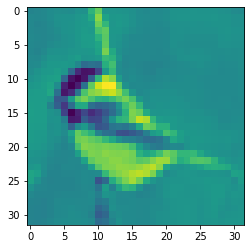

In [6]:
#example 
example = iter(Train_loader)
image,label = example.next() 
plt.imshow(image[0][0])   #normalized images
print(classes[label[0]])

In [7]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3,32,3)    #input_channels , output_channels , kernel_size(filter_size) , padding = 0 and stride = 1 as default   (30,30,32)
    self.Pool1 = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(32,64,3)  #output_chanels , outputs_channels2                 
    self.linear1 = nn.Linear(64*13*13,64)    #64 neurons and flatten              
    self.linear2 = nn.Linear(64,32)
    self.linear3 = nn.Linear(32,10)
  
  def forward(self,x):
    out = self.conv1(x)          
    out = F.relu(out) 
    out = self.Pool1(out)
    out = self.conv2(out)
    out = F.relu(out) 
    out = out.view(10,64*13*13)  #Flatten
    out = self.linear1(out)
    out = F.relu(out)
    out = self.linear2(out)
    out = F.relu(out)
    out = self.linear3(out)  
    return out

In [8]:
model = ConvNet().to(device)

In [9]:
#model config
Learning_rate = 0.001
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=Learning_rate)

In [10]:
#Training
epochs = 5
for epoch in range(epochs) : 
  for i, (image , labels) in enumerate(Train_loader):
    image =image.to(device)
    labels =labels.to(device)
    #forward 
    output = model(image)
    loss = Loss(output, labels)
    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1) % 2000 == 0:
      print(f'epoch{epoch}/{epochs}      step : {i+1}/{len(Train_loader)}         loss: {loss.item():.4f}')


epoch0/5      step : 2000/5000         loss: 1.1849
epoch0/5      step : 4000/5000         loss: 1.6130
epoch1/5      step : 2000/5000         loss: 0.7818
epoch1/5      step : 4000/5000         loss: 1.5834
epoch2/5      step : 2000/5000         loss: 1.3228
epoch2/5      step : 4000/5000         loss: 0.5385
epoch3/5      step : 2000/5000         loss: 0.5934
epoch3/5      step : 4000/5000         loss: 0.5324
epoch4/5      step : 2000/5000         loss: 0.2766
epoch4/5      step : 4000/5000         loss: 1.1584


In [14]:
#evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in Test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(4):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


Accuracy of the network: 83.444 %
Accuracy of plane: 76.96151924037981 %
Accuracy of car: 92.6040061633282 %
Accuracy of bird: 63.18383440118285 %
Accuracy of cat: 66.94499017681729 %
Accuracy of deer: 83.38353413654619 %
Accuracy of dog: 83.27661643169665 %
Accuracy of frog: 89.02681231380338 %
Accuracy of horse: 89.35950413223141 %
Accuracy of ship: 95.97382989431304 %
Accuracy of truck: 92.8535732133933 %


In [38]:
#evaluation
j=0
l=0
i=0
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in Test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        for i in range(10) : 
           if predicted[i] != labels[i] : 
              l+=1
          
    

print(f' number of wrong predictions: {l}        accuracy: {l/n_samples}')

 number of wrong predictions: 8278        accuracy: 0.16556
